# Radiomic maps test


In [7]:
import nibabel as nib 
import matplotlib.pyplot as plt
import numpy as np
from radiomics import featureextractor
import SimpleITK as sitk


# Load data

In [2]:
img = nib.load('data/Patient01_mridian_ttt_1.nii').get_fdata()
print(img.shape)
mask = nib.load('data/Patient01_mridian_ttt_1_gtv.nii').get_fdata()

(276, 276, 80)


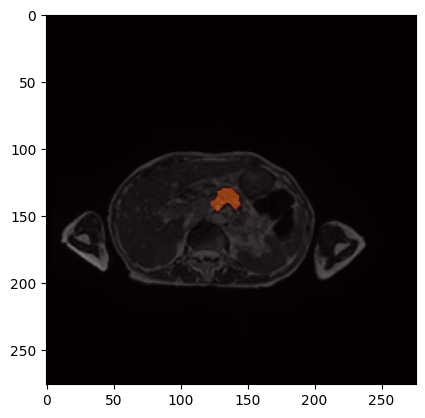

In [3]:
plt.figure()
plt.imshow(img[:,:,40], cmap='gray')
# plot mask on top of image
plt.imshow(mask[:, :, 40], vmin=0, vmax=2, cmap='hot', alpha=.5)


# Compute radiomic map

## Get masked image

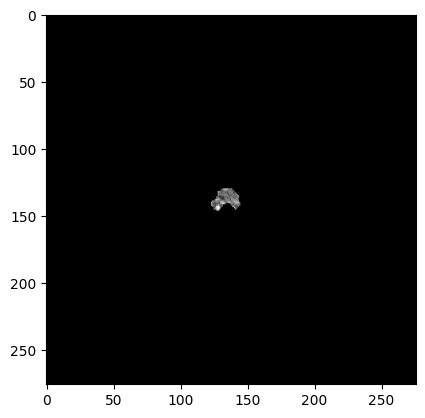

In [4]:
# keep only voxels of img where mask is 1 
img_masked = img * (mask == 1)
plt.figure()
plt.imshow(img_masked[:,:,40], cmap='gray')

In [5]:
print(np.min(img_masked), np.max(img_masked))

0.0 424.0


In [13]:
extractor = featureextractor.RadiomicsFeatureExtractor('params.yaml')
result = extractor.execute('data/Patient01_mridian_ttt_1.nii', 'data/Patient01_mridian_ttt_1_gtv.nii')

In [17]:
print(result)

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.1.0'), ('diagnostics_Versions_Numpy', '1.24.4'), ('diagnostics_Versions_SimpleITK', '2.4.0'), ('diagnostics_Versions_PyWavelet', '1.4.1'), ('diagnostics_Versions_Python', '3.8.20'), ('diagnostics_Configuration_Settings', {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': [1, 1, 1], 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 25}), ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}, 'Wavelet': {}}), ('diagnostics_Image-original_Hash', '4dae11dccfc5233607c69b3a41bcfd541fde965a'), ('diagnostics_Image-original_Dimensionality', '3D'), ('diagnostics_Image-original_Spacing', (1.6304397583007812, 1.6304397583007812, 3.000000238418579)), ('diagnostics_Image-original_Size', (276, 276, 80))